In [39]:
from keras.models import load_model
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import time
import pickle

import tensorflow as tf
global graph

graph = tf.get_default_graph()

%matplotlib inline

In [42]:
model = load_model('data/pretrained/_vgg16_.52-0.93.hdf5', compile=False)

def recognize(img):
    start_time = time.time()
    x = (img/225.)
    prediction = model.predict(np.expand_dims(x, axis=0))[0]
    
    respond_time = time.time() - start_time
    
    return prediction

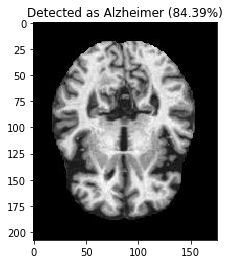

In [43]:
label = ['Alzheimer', 'Non Alzheimer']

image = cv2.imread('data/mri/validation/alzheimers/YAL0047.jpg')
# image = cv2.imread('data/mri/validation/nonalzheimers/NAL0010.jpg')

x = cv2.resize(image,(150,150))
prediction = recognize(x)
img_label = label[np.argmax(prediction)]

confidence = "%.2f" % (prediction[np.argmax(prediction)] * 100)
# respond_time = "%.2f" % respond_time
img_plot = image[...,::-1]

plt.imshow(img_plot)
plt.title(f'Detected as {img_label} ({confidence}%)')